In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/brain-tumor-classification-mri/Testing/'):
    print(dirname)
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Testing/
/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor
/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor
/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor
/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor


In [2]:
label = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [3]:
train_path = '/kaggle/input/brain-tumor-classification-mri/Training/'
test_path = '/kaggle/input/brain-tumor-classification-mri/Testing/'

In [4]:
x_train,y_train = [],[]
for d,_,f in os.walk(train_path):
    for files in f:
        x_train.append(os.path.join(d,files))
        y_train.append(d.split('/')[-1])
    

In [5]:
x_train[670],y_train[670]

('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (766).jpg',
 'pituitary_tumor')

In [6]:
x_test,y_test = [],[]
for d,_,f in os.walk(test_path):
    for files in f:
        x_test.append(os.path.join(d,files))
        y_test.append(d.split('/')[-1])
    

In [7]:
x_test[70],y_test[70]

('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(70).jpg',
 'no_tumor')

In [8]:
from tensorflow.keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense,Activation,add,MaxPool2D,Conv2D,Flatten
import cv2
from tensorflow.keras.utils import img_to_array


In [9]:
data_train=[]
for img in x_train:
    img_array = cv2.imread(img)
    img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    img_array = cv2.resize(img_array,(100,100))
    data_train.append(img_array)

In [10]:
data_train[0].shape

(100, 100)

In [11]:
df = pd.DataFrame(y_train,columns=['label'])
df.head()


,label
0,no_tumor
1,no_tumor
2,no_tumor
3,no_tumor
4,no_tumor


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

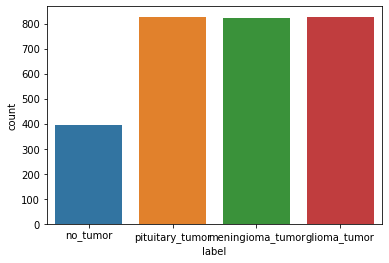

In [12]:
import seaborn as sns
sns.countplot(df['label'])

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = to_categorical(y_train,4)

y_train[0]

array([0., 0., 1., 0.], dtype=float32)

In [14]:
model = Sequential()

2022-12-29 19:04:26.734254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-29 19:04:26.735216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-29 19:04:26.994439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-29 19:04:26.995361: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-29 19:04:26.996141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [15]:
model.add(ResNet50(include_top=False,weights=None,input_shape=(100,100,1),classes=4))
model.add(Flatten())
model.add(Dense(150,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23581440  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 150)               4915350   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 604       
Total params: 28,497,394
Trainable params: 28,444,274
Non-trainable params: 53,120
_________________________________________________________________


In [17]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [18]:
data_train = np.array(data_train)
X = data_train/255

In [54]:
model.fit(X,y_train,batch_size=30,epochs=5)

Epoch 1/5
96/96 [==============================] - 9s 98ms/step - loss: 0.0758 - accuracy: 0.9721
Epoch 2/5
96/96 [==============================] - 10s 100ms/step - loss: 0.0841 - accuracy: 0.9690
Epoch 3/5
96/96 [==============================] - 10s 101ms/step - loss: 0.0855 - accuracy: 0.9686
Epoch 4/5
96/96 [==============================] - 10s 100ms/step - loss: 0.0952 - accuracy: 0.9631
Epoch 5/5
96/96 [==============================] - 10s 99ms/step - loss: 0.0515 - accuracy: 0.9801


In [55]:
model.save('tumor_model.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [56]:
data_test=[]
for img in x_test:
    img_array = cv2.imread(img)
    img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    img_array = cv2.resize(img_array,(100,100))
    data_test.append(img_array)
data_test = np.array(data_test)
data_test = data_test/255

In [57]:
y_test = le.fit_transform(y_test)
y_test = to_categorical(y_test,4)
y_test

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [58]:

pred = model.predict(data_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [63]:
accuracy_score(pred.argmax(axis=1),y_test.argmax(axis=1))

0.7309644670050761

In [62]:
confusion_matrix(pred.argmax(axis=1),y_test.argmax(axis=1))

array([[ 18,   0,   0,   2],
       [ 46, 112,   8,   5],
       [ 28,   3,  97,   6],
       [  8,   0,   0,  61]])

In [64]:
pred = model.predict(X)

In [65]:

accuracy_score(pred.argmax(axis=1),y_train.argmax(axis=1))

0.9933797909407666